<a href="https://colab.research.google.com/github/sourabhhegde/Instrumentdetection/blob/main/Copy_of_instrument_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Welcome to our project on Instrument Classification! In today's digital age, the ability to automatically recognize musical instruments in audio files holds significant importance for various applications in music technology, such as music recommendation systems, digital music libraries, and educational tools. This project aims to harness the power of machine learning to accurately identify different musical instruments from sound clips.

### Objective

The primary objective of this project is to develop a machine learning model capable of detecting specific musical instruments within audio tracks. We'll be utilizing the IRMAS dataset, which is specifically designed for instrument recognition in musical mixtures. By the end of this project, we aim to:

- Implement a robust model that can classify audio clips into categories based on the instrument being played.
- Explore and compare different feature extraction techniques and their effectiveness in improving classification accuracy.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install librosa numpy matplotlib tensorflow keras torch torchaudio torchvision pydub soundfile


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 850.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
!wget -c "https://zenodo.org/record/1290750/files/IRMAS-TrainingData.zip"
!unzip -q IRMAS-TrainingData.zip -d IRMAS


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/IRMAS/IRMAS-TrainingData"
print("Available instrument classes:", os.listdir(dataset_path))


Available instrument classes: ['cel', 'cla', 'flu', 'gel', 'org', 'tru', 'vio', 'README.txt', 'gac', 'pia', 'sax', 'voi']


The dataset used for this project is the IRMAS dataset, which we accessed from Hugging Face Datasets. It is designed for automatic recognition of musical instruments in polyphonic audio recordings. The dataset consists of short audio clips where a specific instrument is dominant in the mix.

The classes (instrument labels) in the dataset are represented by short codes. Here are the full names of the instrument classes:

- **cel** — Cello  
- **cla** — Clarinet  
- **flu** — Flute  
- **gel** — Acoustic Guitar (steel)  
- **org** — Organ  
- **tru** — Trumpet  
- **vio** — Violin  
- **gac** — Acoustic Guitar (nylon/classical)  
- **pia** — Piano  
- **sax** — Saxophone  
- **voi** — Voice (singing)


In [ ]:
!mv /content/IRMAS /content/drive/MyDrive/


### Librosa: A Brief Overview

**What is Librosa?**  
Librosa is a Python library designed specifically for audio and music analysis, offering tools to extract information from audio signals and perform various signal processing tasks.

**Why Use Librosa?**  
Librosa is popular in the audio analysis field due to its ability to handle complex audio processing tasks with simple function calls. Key features include:
- Efficient audio loading and feature extraction
- Advanced time-frequency transformations
- Beat detection and tempo analysis

**Importance of Librosa**  
Librosa simplifies the development of music information retrieval systems by providing extensive tools for audio analysis, making it invaluable for applications in music recommendation, audio segmentation, and more.

**Development**  
Developed by Brian McFee during his tenure at Columbia University, Librosa is maintained by a community of audio and music technology researchers, ensuring it remains at the forefront of audio analysis tools.


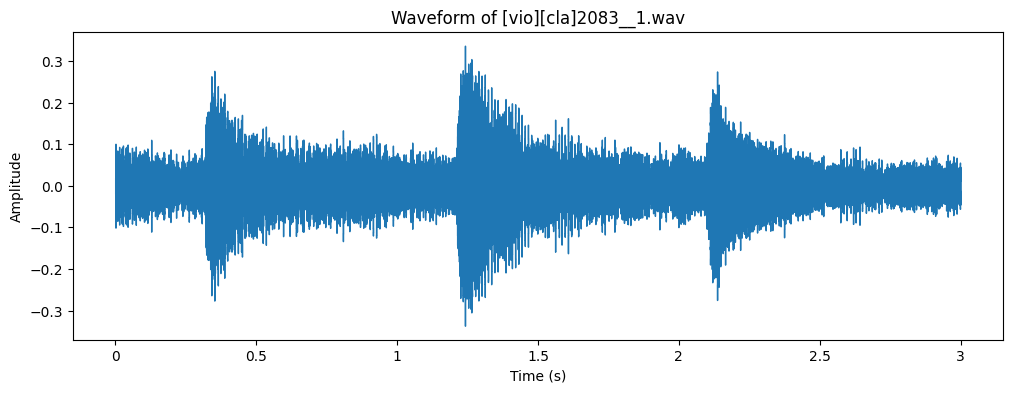

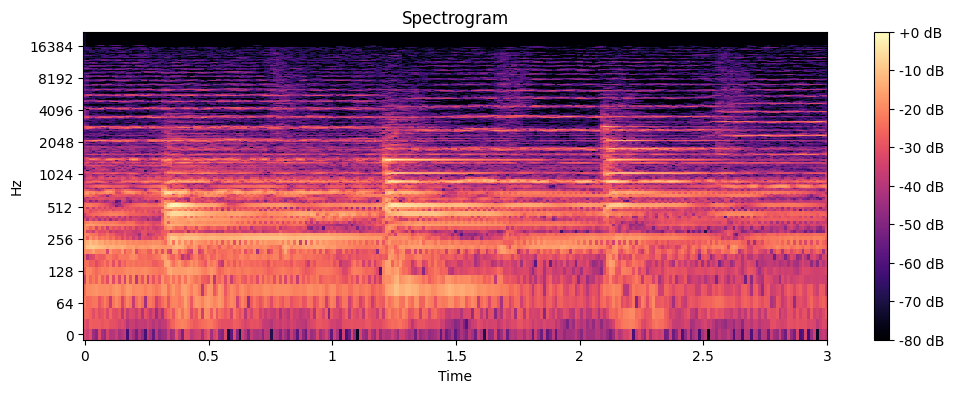

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Set dataset path
dataset_path = "/content/drive/MyDrive/IRMAS/IRMAS-TrainingData"

# Select an instrument category (e.g., violin)
instrument = "vio"  # Change this to any instrument folder
sample_file = os.path.join(dataset_path, instrument, os.listdir(os.path.join(dataset_path, instrument))[0])

# Load the audio file
y, sr = librosa.load(sample_file, sr=None)

# Plot waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform of {sample_file.split('/')[-1]}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Plot spectrogram
plt.figure(figsize=(12, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram")
plt.show()


This waveform visualization of a sound file illustrates several key aspects of the sound:

1. Amplitude Variation: The vertical axis shows the amplitude, indicating the loudness at different points. Higher peaks mean louder sounds; smaller peaks suggest quieter ones.

2. Time: The horizontal axis represents time in seconds, allowing us to see how the sound evolves and the duration of various sounds within the recording.

3. Waveform Shape: The shape of the waveform provides insights into the type of sound (such as music, speech, or noise) and its characteristics. Smooth waveforms often represent tonal sounds, while erratic shapes may indicate percussive sounds or noise.

4. Energy Distribution: The density of the waves indicates the presence of high-frequency components (tighter waves) versus low-frequency components (more spread out waves).

This visualization is useful for audio engineers, musicians, and anyone involved in sound editing or analysis, offering a quick visual interpretation of sound's loudness, energy, and temporal changes.


A spectrogram helps us understand:
- **Frequency Content**: Shows which frequencies are present in a sound at any given moment.
- **Temporal Evolution**: Illustrates how these frequencies change over time.
- **Intensity and Loudness**: Indicates the loudness of different frequencies using color intensity, with louder sounds in warmer colors and quieter sounds in cooler colors.
- **Sound Characteristics**: Helps identify unique features of sounds, such as the tonal quality, pitch changes, and dynamics, useful for analyzing speech, music, and environmental noises.


In [ ]:
sr

44100


🎵 Showing waveform and spectrogram for: Cello


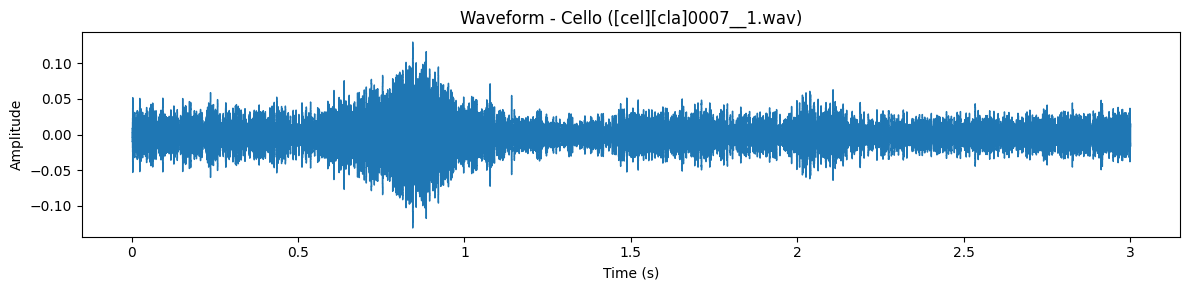

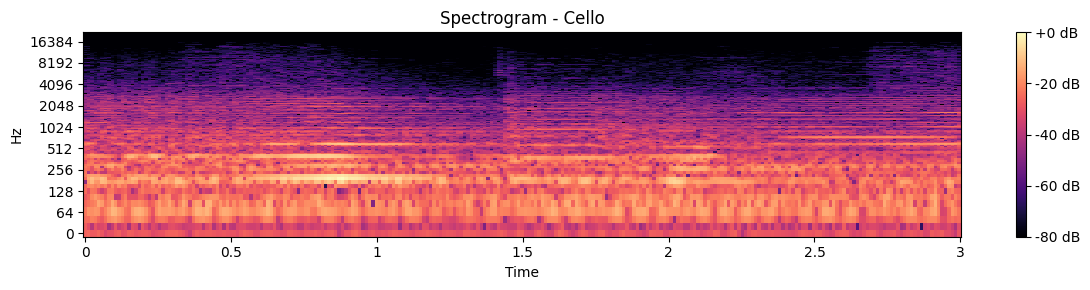


🎵 Showing waveform and spectrogram for: Clarinet


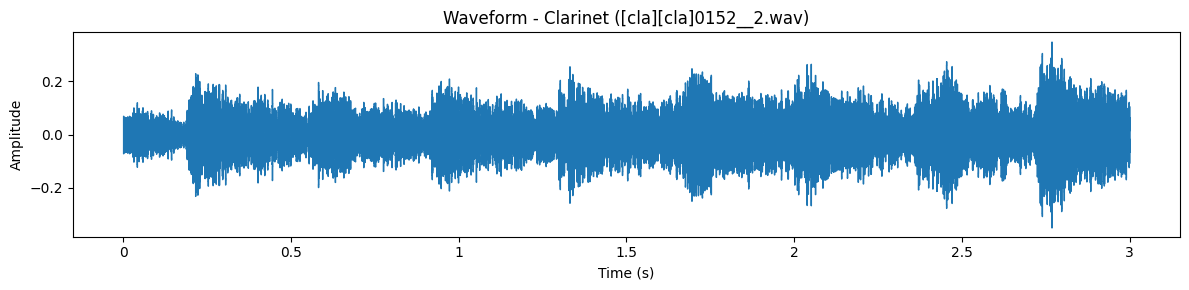

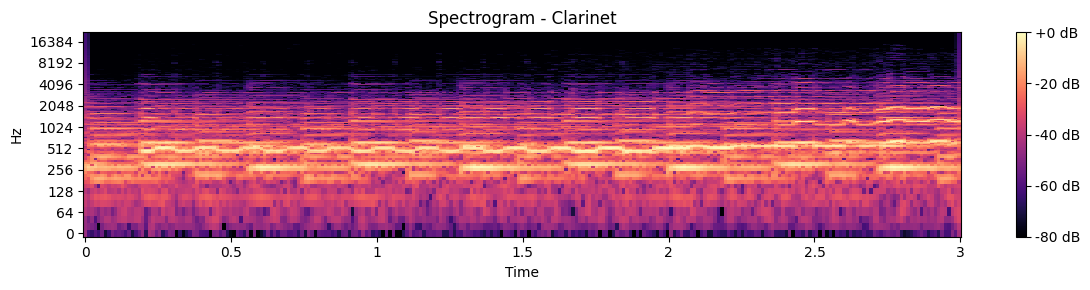


🎵 Showing waveform and spectrogram for: Flute


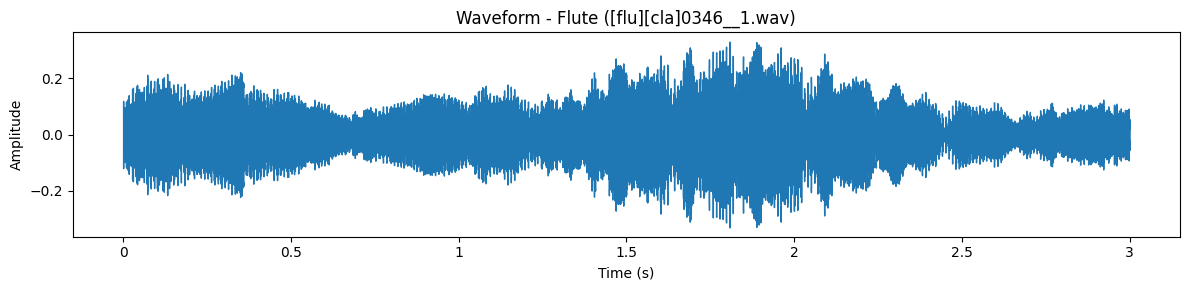

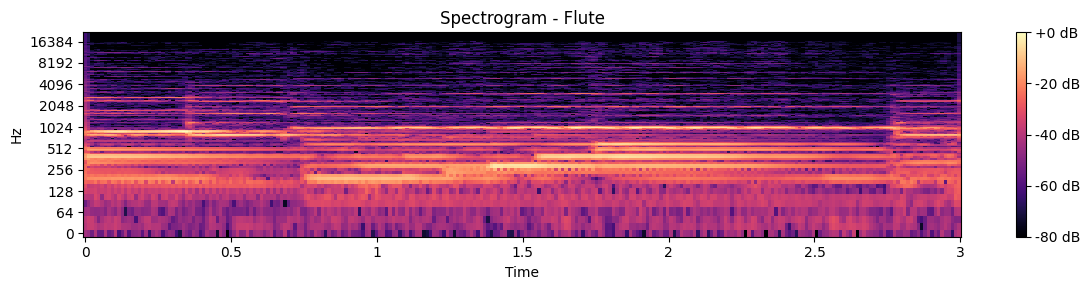


🎵 Showing waveform and spectrogram for: Acoustic Guitar (steel)


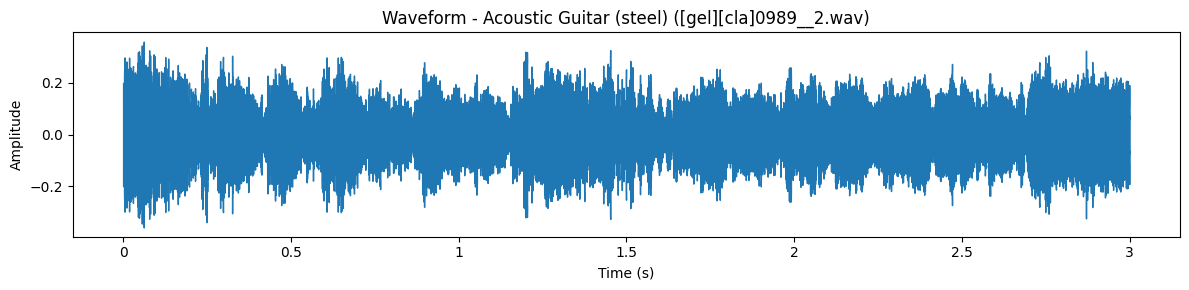

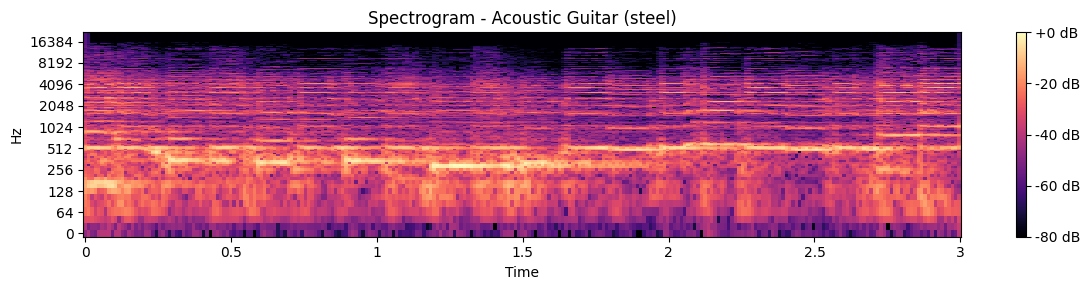


🎵 Showing waveform and spectrogram for: Organ


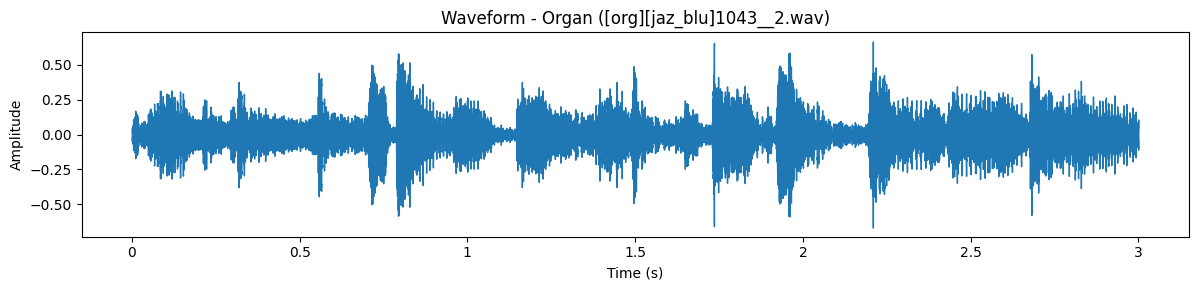

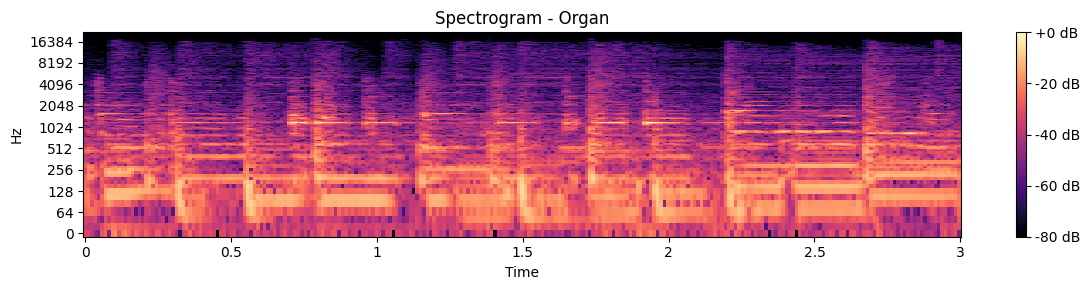


🎵 Showing waveform and spectrogram for: Trumpet


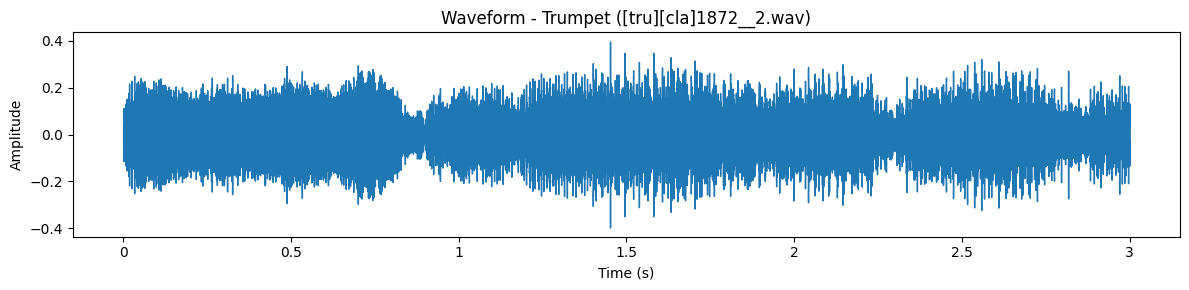

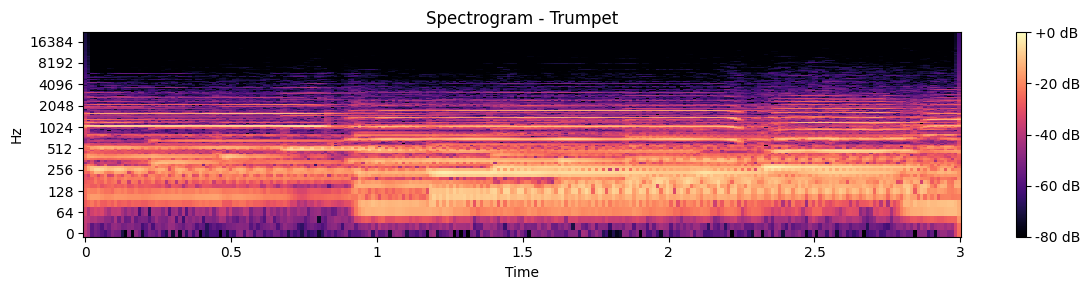


🎵 Showing waveform and spectrogram for: Violin


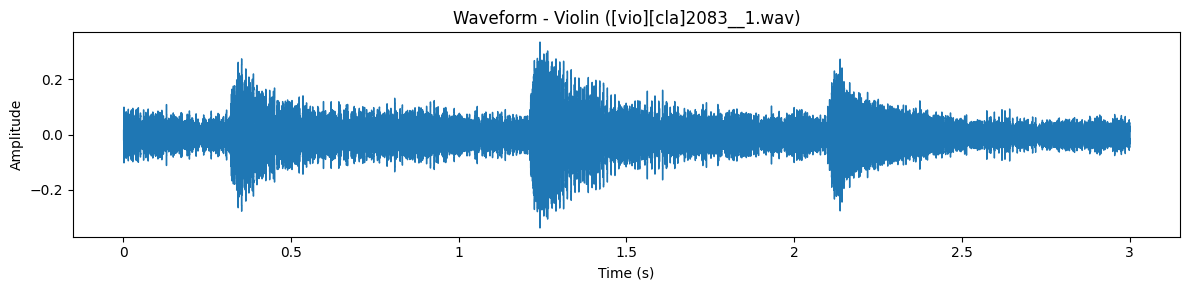

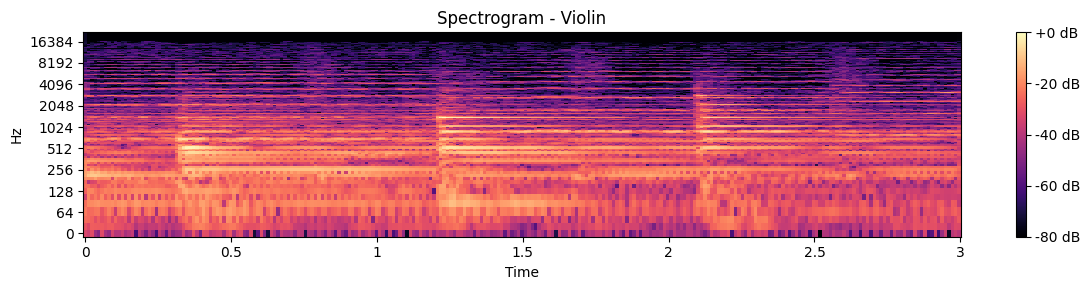


🎵 Showing waveform and spectrogram for: Acoustic Guitar (nylon/classical)


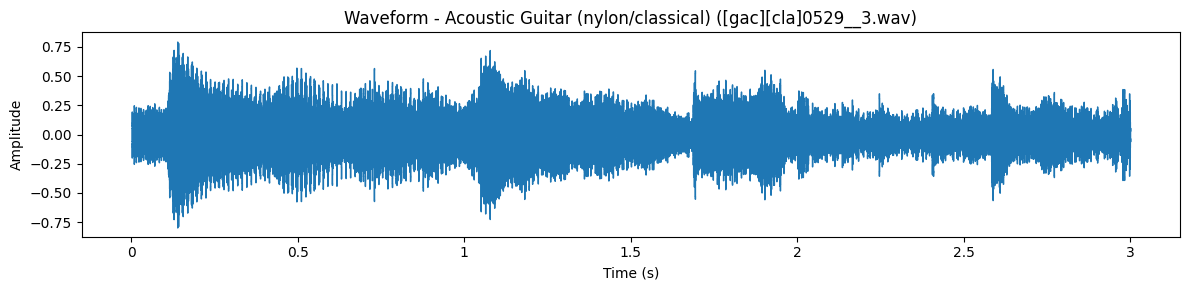

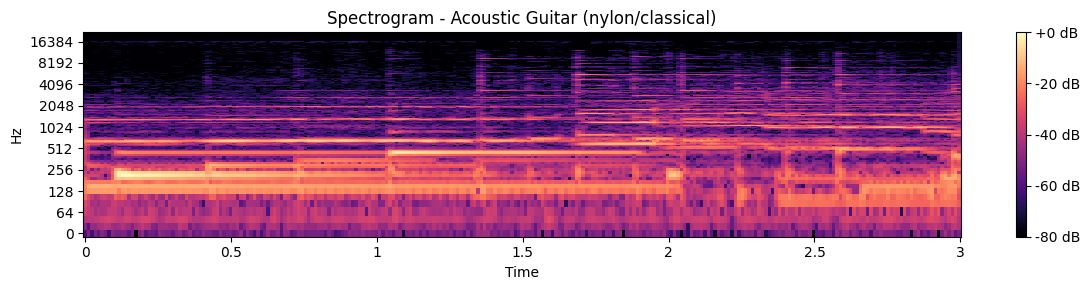


🎵 Showing waveform and spectrogram for: Piano


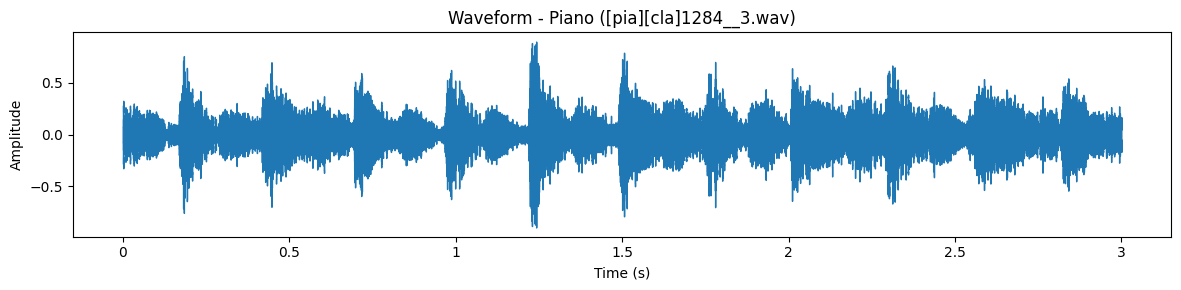

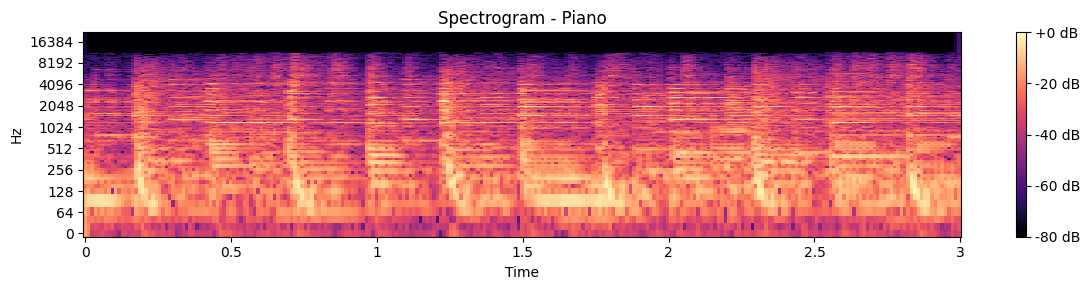


🎵 Showing waveform and spectrogram for: Saxophone


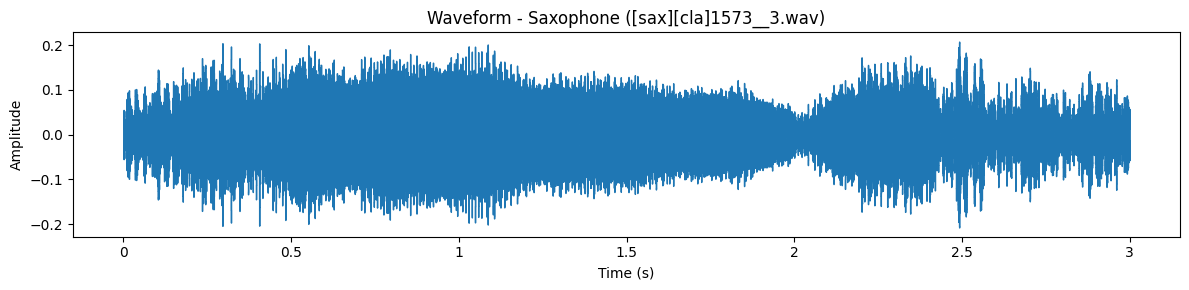

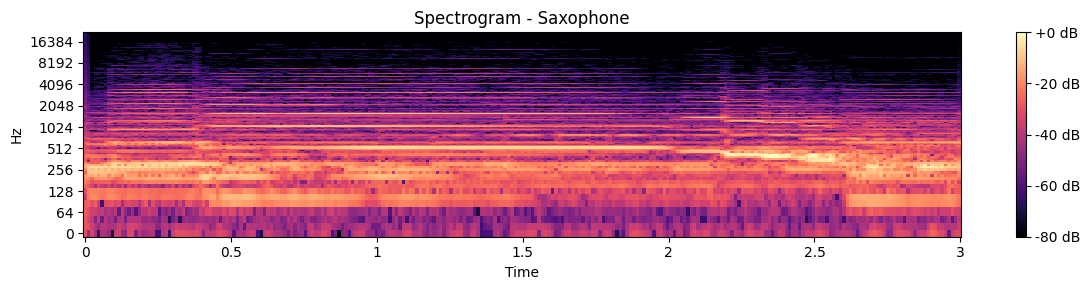


🎵 Showing waveform and spectrogram for: Voice (singing)


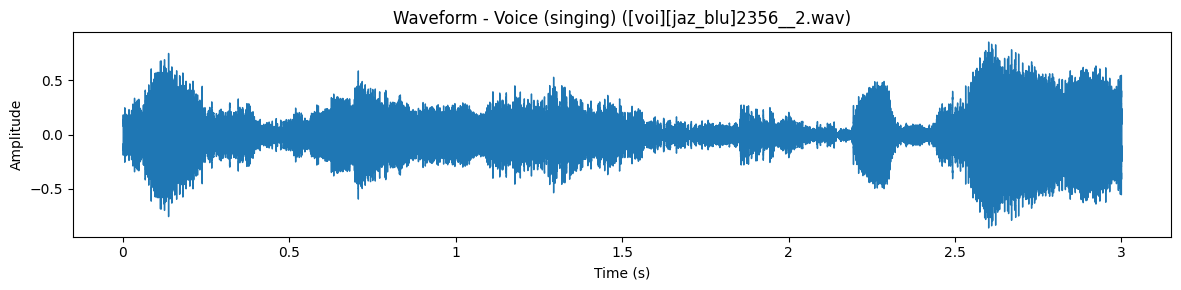

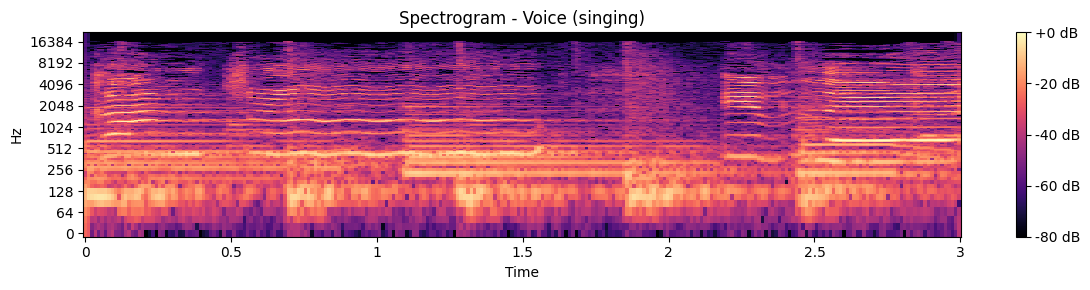

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Path to your dataset
dataset_path = "/content/drive/MyDrive/IRMAS/IRMAS-TrainingData"

# Instrument code to name mapping
instruments = {
    "cel": "Cello",
    "cla": "Clarinet",
    "flu": "Flute",
    "gel": "Acoustic Guitar (steel)",
    "org": "Organ",
    "tru": "Trumpet",
    "vio": "Violin",
    "gac": "Acoustic Guitar (nylon/classical)",
    "pia": "Piano",
    "sax": "Saxophone",
    "voi": "Voice (singing)"
}

# Loop through all instrument classes
for code, name in instruments.items():
    print(f"\n🎵 Showing waveform and spectrogram for: {name}")

    # Get the first sample from the folder
    folder_path = os.path.join(dataset_path, code)
    sample_file = os.path.join(folder_path, os.listdir(folder_path)[0])

    # Load the audio file
    y, sr = librosa.load(sample_file, sr=None)

    # Plot waveform
    plt.figure(figsize=(12, 3))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform - {name} ({sample_file.split('/')[-1]})")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

    # Plot spectrogram
    plt.figure(figsize=(12, 3))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Spectrogram - {name}")
    plt.tight_layout()
    plt.show()


In [ ]:

min(y)

np.float32(-0.8540344)

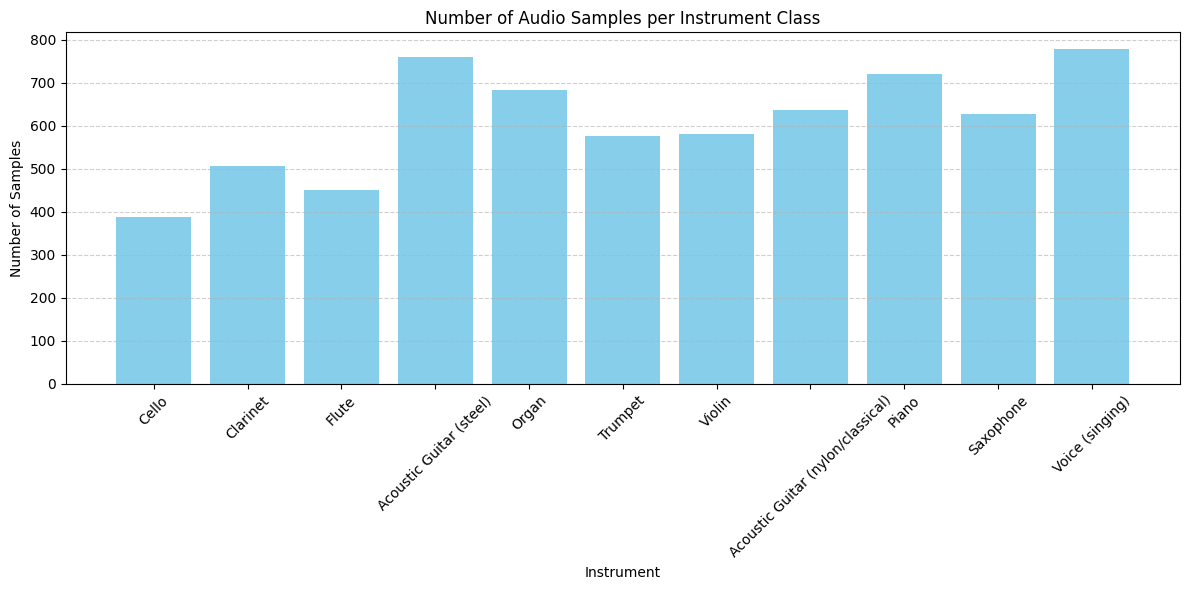

In [ ]:
import os
import matplotlib.pyplot as plt

# Path to IRMAS dataset
dataset_path = "/content/drive/MyDrive/IRMAS/IRMAS-TrainingData"

# Instrument label mapping
instruments = {
    "cel": "Cello",
    "cla": "Clarinet",
    "flu": "Flute",
    "gel": "Acoustic Guitar (steel)",
    "org": "Organ",
    "tru": "Trumpet",
    "vio": "Violin",
    "gac": "Acoustic Guitar (nylon/classical)",
    "pia": "Piano",
    "sax": "Saxophone",
    "voi": "Voice (singing)"
}

# Count samples per class
sample_counts = {}
for code in instruments:
    folder_path = os.path.join(dataset_path, code)
    files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]
    sample_counts[instruments[code]] = len(files)

# Plotting the histogram
plt.figure(figsize=(12, 6))
plt.bar(sample_counts.keys(), sample_counts.values(), color='skyblue')
plt.xticks(rotation=45)
plt.title("Number of Audio Samples per Instrument Class")
plt.xlabel("Instrument")
plt.ylabel("Number of Samples")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import os
import librosa
import pandas as pd
from tqdm import tqdm

# Path to IRMAS dataset
dataset_path = "/content/drive/MyDrive/IRMAS/IRMAS-TrainingData"

# Store stats here
stats = []

# Loop through each instrument folder
for label in tqdm(os.listdir(dataset_path)):
    folder_path = os.path.join(dataset_path, label)
    if not os.path.isdir(folder_path):
        continue  # Skip non-folder items like README.txt

    for file in os.listdir(folder_path):
        if file.endswith(".wav"):
            file_path = os.path.join(folder_path, file)

            try:
                y, sr = librosa.load(file_path, sr=None)

                mean_amp = y.mean()
                std_amp = y.std()
                max_amp = y.max()
                min_amp = y.min()

                stats.append({
                    "file": file,
                    "label": label,
                    "mean": mean_amp,
                    "std": std_amp,
                    "max": max_amp,
                    "min": min_amp
                })

            except Exception as e:
                print(f"Error loading {file_path}: {e}")


100%|██████████| 12/12 [05:33<00:00, 27.81s/it]


In [ ]:
df_stats = pd.DataFrame(stats)


In [ ]:
# Define path to save
save_path = "/content/drive/MyDrive/IRMAS/IRMAS_WaveformStats.csv"

# Save to CSV
df_stats.to_csv(save_path, index=False)

print(f"✅ Waveform stats saved to: {save_path}")


✅ Waveform stats saved to: /content/drive/MyDrive/IRMAS/IRMAS_WaveformStats.csv


In [ ]:
import pandas as pd

# Define path where the CSV is saved
load_path = "/content/drive/MyDrive/IRMAS/IRMAS_WaveformStats.csv"

# Load the DataFrame from CSV
df_stats = pd.read_csv(load_path)

# Display summary statistics
print("📈 Basic Summary:\n")
print(df_stats.describe())

# Check for potentially clipped samples
clipped = df_stats[(df_stats["max"] >= 0.999) | (df_stats["min"] <= -0.999)]
print(f"\n🔍 Potentially Clipped Samples: {len(clipped)}")

# Check for near-silent samples
silent = df_stats[df_stats["std"] < 0.005]
print(f"\n🛑 Potentially Silent Samples: {len(silent)}")

# Since the DataFrame is already on your drive, this step is just a reiteration:
# Optionally, you can skip saving it again if no changes have been made.
df_stats.to_csv(load_path, index=False)
print(f"✅ Data re-saved (if necessary) to: {load_path}")



📈 Basic Summary:

              mean          std          max          min
count  6705.000000  6705.000000  6705.000000  6705.000000
mean     -0.000405     0.108187     0.498616    -0.497166
std       0.001837     0.071061     0.283015     0.283340
min      -0.018821     0.002688     0.012497    -1.000000
25%      -0.000312     0.050356     0.253922    -0.726151
50%      -0.000026     0.096711     0.483048    -0.479111
75%       0.000034     0.150236     0.720673    -0.252350
max       0.016883     0.405465     0.999969    -0.013657

🔍 Potentially Clipped Samples: 284

🛑 Potentially Silent Samples: 21
✅ Data re-saved (if necessary) to: /content/drive/MyDrive/IRMAS/IRMAS_WaveformStats.csv


# Statistical Summary of Audio Dataset

**Total Samples Analyzed**: 6705

**Mean Values**:
- Mean of means: -0.000405 (Average amplitude centered around zero, typical for audio)
- Mean of standard deviations: 0.108187 (Average variation in signal loudness)
- Mean of maximums: 0.498616 (Average peak amplitude)
- Mean of minimums: -0.497166 (Average lowest amplitude)

**Standard Deviation Values**:
- Std of means: 0.001837 (Variability of average amplitudes across samples)
- Std of standard deviations: 0.071061 (Variability in loudness across samples)
- Std of maximums: 0.283015 (Variability in peak amplitudes)
- Std of minimums: 0.283340 (Variability in lowest amplitudes)

**Minimum Values**:
- Minimum mean: -0.018821
- Minimum std: 0.002688
- Minimum max: 0.012497
- Absolute minimum: -1.000000 (Indicates potential clipping at lower boundary)

**Percentiles (25%, 50% - Median, 75%)**:
- These values provide insights into the lower quartile, median, and upper quartile of the dataset, which help in understanding the distribution and central tendency of the data.

**Maximum Values**:
- Maximum mean: 0.016883
- Maximum std: 0.405465
- Maximum max: 0.999969 (Nearly full dynamic range, possible clipping)
- Maximum min: -0.013657

**Analysis Importance**:
- **Data Quality and Consistency**: Highlight potential issues like clipping and silent samples.
- **Data Preparation for Modeling**: Inform preprocessing needs for normalization and feature engineering.
- **Insightful for Enhanced Decision Making**: Guides the development of robust data-driven models by ensuring a deep understanding of dataset properties.

This analysis is critical for ensuring the audio data's integrity and readiness for further processing and modeling.


In [ ]:
df_stats

,file,label,mean,std,max,min
0,[cel][cla]0007__1.wav,cel,0.001114,0.019345,0.102234,-0.130478
1,[cel][cla]0008__2.wav,cel,-0.000070,0.044717,0.205521,-0.234848
2,[cel][cla]0003__3.wav,cel,0.000285,0.020616,0.085464,-0.086075
3,[cel][cla]0007__2.wav,cel,0.000916,0.021805,0.084625,-0.088974
4,[cel][cla]0007__3.wav,cel,0.000894,0.023381,0.114883,-0.104080
...,...,...,...,...,...,...
6700,265__[voi][nod][cou_fol]2409__3.wav,voi,0.000139,0.234178,0.990509,-0.990387
6701,265__[voi][nod][cou_fol]2409__2.wav,voi,0.000019,0.207683,0.985367,-0.980530
6702,[voi][pop_roc]2341__3.wav,voi,-0.000015,0.093087,0.501999,-0.445740
6703,[voi][pop_roc]2341__2.wav,voi,0.000023,0.090123,0.357208,-0.386169


In [ ]:
s

✅ Clean samples: 6400
🗑️ Removed: 305 bad samples


In [ ]:
# Get only directories (ignore files like README.txt)
instrument_classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
print("Instrument Classes:", instrument_classes)


Instrument Classes: ['cel', 'cla', 'flu', 'gel', 'org', 'tru', 'vio', 'gac', 'pia', 'sax', 'voi']


In [ ]:
folder_path = os.path.join(dataset_path, code)
sample_file = os.path.join(folder_path, os.listdir(folder_path)[0])

In [ ]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs = np.mean(mfccs, axis=1)  # Take the mean across time

    # Extract Chroma Features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma = np.mean(chroma, axis=1)

    # Extract Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    spectral_contrast = np.mean(spectral_contrast, axis=1)

    # Combine all features into one array
    features = np.hstack([mfccs, chroma, spectral_contrast])
    return features

# Test with one file
features = extract_features(sample_file)
print("Feature shape:", features.shape)
print("Extracted features:", features)


Feature shape: (32,)
Extracted features: [-181.97956848  135.4969635   -36.01955414   62.70333481  -12.99224281
   20.77396965  -18.07569313    4.84350586  -13.17429924   -3.73924136
  -18.67765427    0.90146476   -8.58667278    0.28722477    0.26222235
    0.24125129    0.34267205    0.57409763    0.39251971    0.20407808
    0.29575726    0.46232387    0.62005121    0.45857042    0.36866575
   19.93754519   10.29302159   19.46600751   20.56761383   20.75500342
   23.71561853   44.96097485]


Brief Explanation of MFCC Computation

1. Pre-Emphasis:
	•	Amplifies the higher frequencies to balance the frequency spectrum since higher frequencies in human speech have lower amplitude.

2. Framing:
	•	Splits the continuous speech signal into discrete frames of 20-40 ms to treat each frame as a stationary process.

3. Windowing:
	•	Applies a window function (like Hamming) to each frame to minimize edge artifacts in the Fourier transform.

4. Fast Fourier Transform (FFT):
	•	Converts each frame from time domain to frequency domain to analyze the frequency components.

5. Mel Filter Bank Processing:
	•	Passes the spectrum through a series of filters to compute a spectral measure that matches the human auditory response.

6. Logarithmic Scale:
	•	Takes the logarithm of all filter bank energies to mimic the logarithmic perception of loudness by human ears.

7. Discrete Cosine Transform (DCT):
	•	Converts the log Mel frequencies into time coefficients, which are the MFCCs, to capture the main characteristics of the audio.

8. MFCCs:
	•	Typically the first 12-13 coefficients are used, capturing the most relevant aspects of the sound.

Intuitive Understanding

MFCCs help machines process and understand audio data in a way that emulates human hearing. Just like breaking down complex landscapes into comprehensible maps, MFCCs simplify sounds into features that reflect their unique characteristics:
	•	Mel scale: Focuses on the details in the frequency areas where the human ear is most sensitive, improving the accuracy of sound interpretation.
	•	DCT: Helps compact the information, making it easier for algorithms to detect patterns such as spoken words or musical notes.

Applications:
	•	Voice and speech recognition: Identifying and understanding spoken commands or conversations.
	•	Music analysis: Distinguishing between different musical instruments and genres.

This streamlined explanation offers a clear understanding of how MFCCs work, bridging technical computation with practical usage, making it accessible for both technical and non-technical audiences.

In [ ]:
X = []
y_labels = []

for _, row in df_clean.iterrows():
    file_path = os.path.join(dataset_path, row["label"], row["file"])

    try:
        # Extract features
        features = extract_features(file_path)
        X.append(features)
        y_labels.append(row["label"])

    except Exception as e:
        print(f"Error processing {file_path}: {e}")


In [ ]:
import pickle

# Path to save the files in your Drive
save_path = "/content/drive/MyDrive/IRMAS_Features"

# Create folder if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Save X (features)
with open(os.path.join(save_path, "X_features.pkl"), "wb") as f:
    pickle.dump(X, f)

# Save y (labels)
with open(os.path.join(save_path, "y_labels.pkl"), "wb") as f:
    pickle.dump(y, f)

print("✅ Features and labels saved to Google Drive.")


NameError: name 'X' is not defined

In [ ]:
import pickle

In [ ]:
# Load X and y from drive
with open("/content/drive/MyDrive/IRMAS_Features/X_features.pkl", "rb") as f:
    X = pickle.load(f)

with open("/content/drive/MyDrive/IRMAS_Features/y_labels.pkl", "rb") as f:
    y = pickle.load(f)

print("✅ Data loaded back from Drive.")


EOFError: Ran out of input

In [ ]:
import pandas as pd

# Load the saved dataset
df = pd.read_csv("/content/drive/MyDrive/IRMAS/features_dataset.csv")
print("Dataset shape:", df.shape)
print(df.head())


Dataset shape: (6705, 33)
            0           1          2          3          4          5  \
0 -423.985168  209.444550   1.022722  15.460402  14.767650  19.308596   
1 -366.927917  235.623840  10.052608  -4.248793   6.744067  13.205822   
2 -397.235870  204.967484 -17.601053  23.602222  11.465492   8.036496   
3 -391.546600  222.765640 -19.994596  24.341356   3.712429  18.560076   
4 -372.484283  225.194717 -30.138899  29.153645   7.139575   9.795342   

          6         7         8         9  ...        23        24         25  \
0 -1.848045 -4.524653  6.662094  4.477195  ...  0.213861  0.244834  10.517361   
1 -8.206558 -6.049451 -0.845916  6.907354  ...  0.476932  0.432174  14.374959   
2  0.994393  6.075274  4.100253 -4.831337  ...  0.458468  0.437627  14.719539   
3 -2.246897 -2.335229  5.364139 -1.507871  ...  0.277226  0.295508  10.799248   
4 -2.070404 -2.937609  1.359244 -0.601581  ...  0.365781  0.372848  11.525268   

          26         27         28         29   

In [ ]:
X = df.drop("label", axis=1).values
y = df["label"].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separate features and labels
X = df.drop(columns=['label']).values  # Feature matrix
y = df['label'].values  # Labels

# Encode labels into numbers
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split into training & testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (5364, 32)
Testing data shape: (1341, 32)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 50, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Grid search
svm_model = SVC(random_state=42)
grid_search = GridSearchCV(svm_model, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_svm = grid_search.best_estimator_
y_pred_best_svm = best_svm.predict(X_test_scaled)

# Evaluate
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
print(f"Tuned SVM Accuracy: {accuracy_best_svm * 100:.2f}%")
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 75 candidates, totalling 225 fits


NameError: name 'accuracy_score' is not defined

In [ ]:
from sklearn.metrics import accuracy_score  # Import accuracy_score function

In [ ]:
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
print(f"Tuned SVM Accuracy: {accuracy_best_svm * 100:.2f}%")
print("Best Parameters:", grid_search.best_params_)

Tuned SVM Accuracy: 67.56%
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Assuming y_test and y_pred_best_svm are already defined as your test labels and predicted labels from the model
accuracy = accuracy_score(y_test, y_pred_best_svm)
precision = precision_score(y_test, y_pred_best_svm, average='macro')  # 'macro' for unweighted mean per label
recall = recall_score(y_test, y_pred_best_svm, average='macro')
f1 = f1_score(y_test, y_pred_best_svm, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred_best_svm)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



Accuracy: 0.68
Precision: 0.68
Recall: 0.67
F1 Score: 0.67


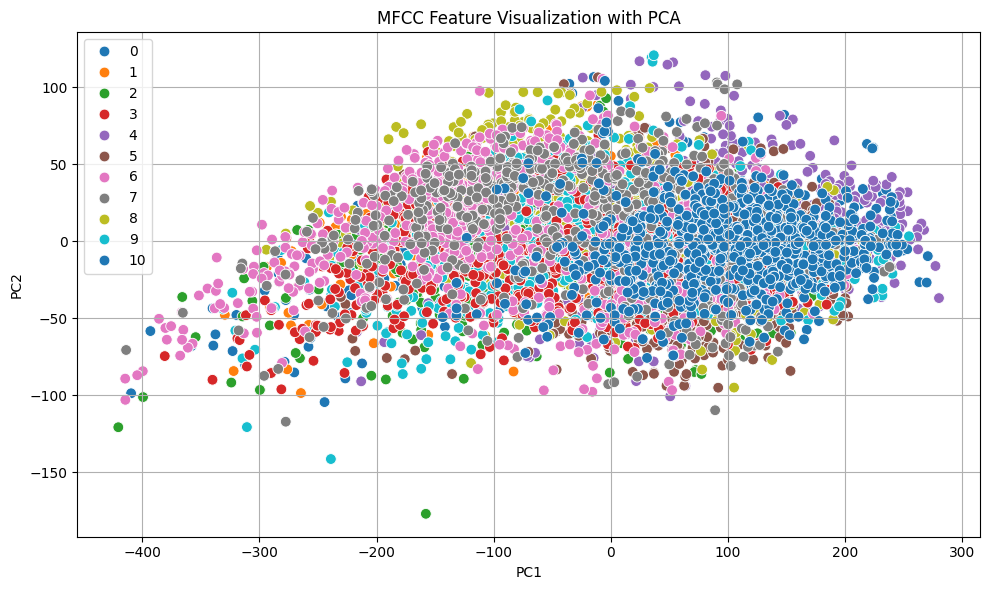

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Import matplotlib.pyplot

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10', s=60)
plt.title("MFCC Feature Visualization with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install lazypredict --quiet

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Make sure your data is ready
# X and y should already be defined before this point

# Split and scale your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy: {accuracy_knn * 100:.2f}%")

# LazyPredict comparison
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

print("\nLazyPredict Model Comparison:")
print(models)


KNN Model Accuracy: 53.84%


 97%|█████████▋| 31/32 [00:50<00:01,  1.62s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 5364, number of used features: 32
[LightGBM] [Info] Start training from score -2.907293
[LightGBM] [Info] Start training from score -2.573750
[LightGBM] [Info] Start training from score -2.684832
[LightGBM] [Info] Start training from score -2.316477
[LightGBM] [Info] Start training from score -2.198904
[LightGBM] [Info] Start training from score -2.279367
[LightGBM] [Info] Start training from score -2.250640
[LightGBM] [Info] Start training from score -2.351096
[LightGBM] [Info] Start training from score -2.478218
[LightGBM] [Info] Start training from score -2.445428
[LightGBM] [Info] Start training from score -2.138576


100%|██████████| 32/32 [00:58<00:00,  1.82s/it]


LazyPredict Model Comparison:
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LabelPropagation                   0.61               0.61    None      0.61   
LabelSpreading                     0.61               0.61    None      0.61   
ExtraTreesClassifier               0.61               0.59    None      0.60   
LGBMClassifier                     0.60               0.59    None      0.60   
RandomForestClassifier             0.59               0.58    None      0.58   
XGBClassifier                      0.59               0.57    None      0.58   
SVC                                0.56               0.56    None      0.56   
NuSVC                              0.55               0.54    None      0.55   
KNeighborsClassifier               0.54               0.54    None      0.54   
QuadraticDiscriminantAnalysis      0.49               0.49    None      0.49   
BaggingCl

In conclusion, to enhance the efficiency of audio classification tasks using deep learning, we can explore a variety of model architectures to find the one that best captures the nuances of our audio data. Experimenting with different models such as Convolutional Neural Networks (CNNs), Recurrent Neural Networks (RNNs), or hybrid approaches can provide insights into which configurations yield the most accurate predictions for our specific task. Once an optimal model is identified, deploying it into a production environment allows us to leverage its capabilities in real-world applications, offering automated and scalable audio analysis. Furthermore, addressing the challenge of class imbalance in our dataset is crucial for improving model performance. Techniques like data augmentation, where synthetic data points are generated through methods such as time stretching, pitch shifting, or adding background noise, can help create a more balanced dataset. This balanced dataset not only trains our model more effectively but also enhances its ability to generalize across diverse audio samples. These steps collectively contribute to a robust, efficient, and deployable audio classification system.